In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


***import all library***

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy import stats

***reading the train data***

In [3]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***reading the test data***

In [4]:
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
missing_value=train.isna().sum().sort_values(ascending=False)
missing_value.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

***drop all columns where missing value greater than 5***

In [7]:
train.drop(missing_value[missing_value>5].index,axis=1,inplace=True)

In [8]:
train.shape

(1460, 63)

***set feature variable***

In [9]:
X=train

***set target variable***

In [10]:
Y=X.SalePrice

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalize')

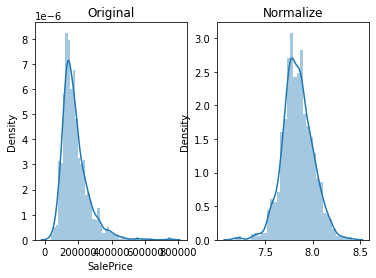

In [11]:
normalize=stats.boxcox(Y)
fig,ax=plt.subplots(1,2)
sns.distplot(Y,ax=ax[0])
ax[0].set_title("Original")
sns.distplot(normalize[0],ax=ax[1])
ax[1].set_title("Normalize")

***correlation between features variable and Target variables***

<AxesSubplot:>

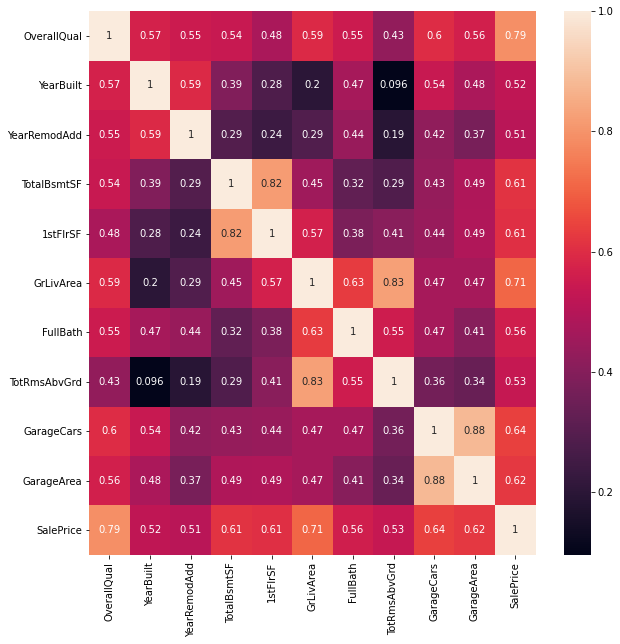

In [12]:
Correlation=X.corr()
high_corr=Correlation.index[Correlation['SalePrice']>.5]
plt.figure(figsize=(10,10))
sns.heatmap(X[high_corr].corr(),annot=True)

In [13]:
high_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

***set the features variable which is greater correlation respect to target variable(SalePrice)***

In [14]:
features=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

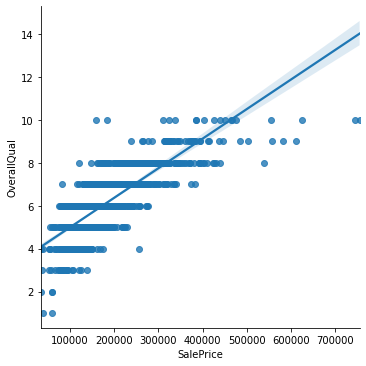

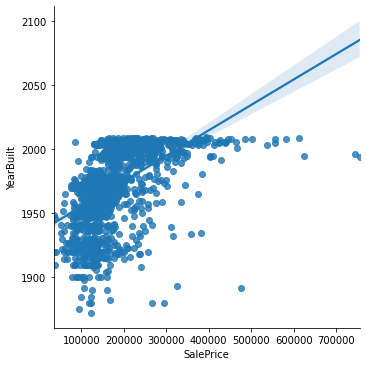

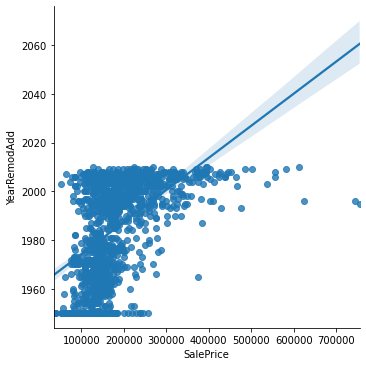

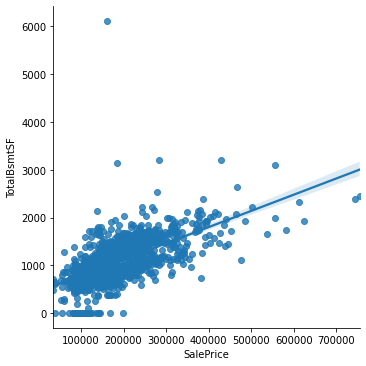

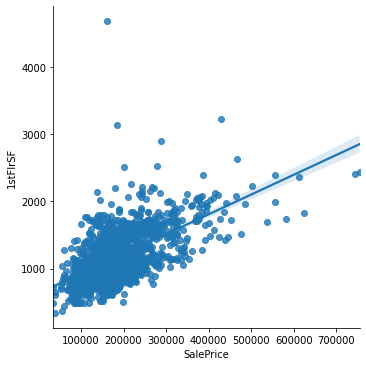

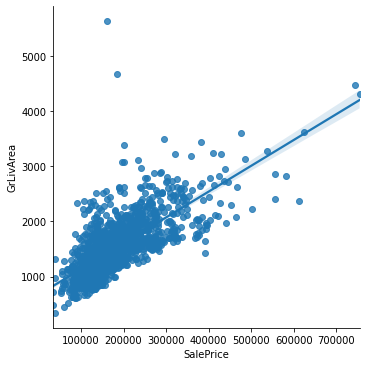

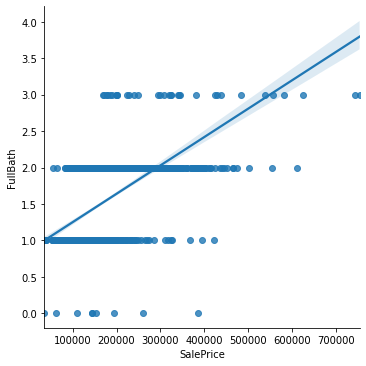

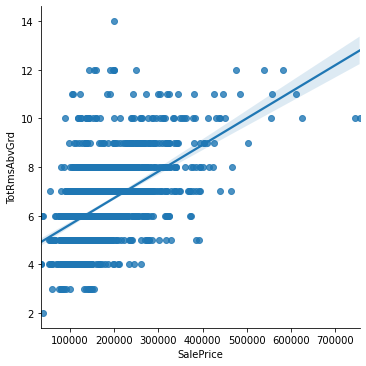

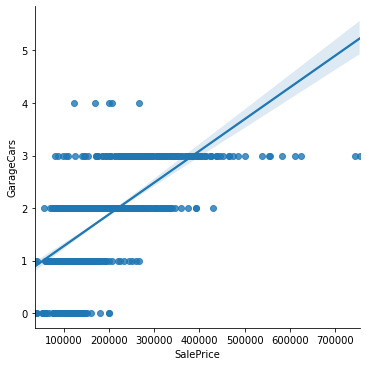

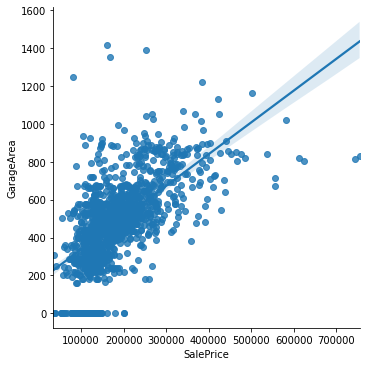

In [15]:
for i in features:
    sns.lmplot(x='SalePrice',y=i,data=X)

In [16]:
test_id = test['Id']
total_data = pd.concat([X, test], axis=0, sort=False)
total_data = total_data.drop(['Id', 'SalePrice'], axis=1)

In [17]:
missing_values_count = total_data.isna().sum().sort_values(ascending=False)
missing_values_count.head(20)

PoolQC          2916
MiscFeature     2868
Alley           2812
Fence           2629
FireplaceQu     2190
LotFrontage     1687
GarageQual      1538
GarageFinish    1538
GarageYrBlt     1538
GarageCond      1538
GarageType      1536
BsmtCond        1505
BsmtExposure    1504
BsmtQual        1504
BsmtFinType2    1502
BsmtFinType1    1502
MasVnrType      1476
MasVnrArea      1475
MSZoning           4
BsmtFullBath       2
dtype: int64

In [18]:
total_data.drop(missing_data[missing_data['missing']>5].index,axis=1,inplace=True)

NameError: name 'missing_data' is not defined

In [19]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

***Label Encoder***

In [20]:
from sklearn.preprocessing import LabelEncoder
object_cols = [col for col in total_data.columns if total_data[col].dtype == "object"]
label_encoder=LabelEncoder()
for col in object_cols:
    total_data[col]=label_encoder.fit_transform(total_data[col])
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int64  
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   int64  
 4   LotShape       2919 non-null   int64  
 5   LandContour    2919 non-null   int64  
 6   Utilities      2919 non-null   int64  
 7   LotConfig      2919 non-null   int64  
 8   LandSlope      2919 non-null   int64  
 9   Neighborhood   2919 non-null   int64  
 10  Condition1     2919 non-null   int64  
 11  Condition2     2919 non-null   int64  
 12  BldgType       2919 non-null   int64  
 13  HouseStyle     2919 non-null   int64  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

***imputer method for numeric value***

In [21]:
from sklearn.impute import SimpleImputer
numeric_cols = [col for col in total_data.columns if total_data[col].dtype in ['int64','float64']]
my_imputer=SimpleImputer(strategy='median')
data = pd.DataFrame(my_imputer.fit_transform(total_data))
data.columns = total_data.columns
a=data.isnull().sum().sort_values(ascending=False)
a.head(25)

MSSubClass       0
WoodDeckSF       0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
PavedDrive       0
SaleType         0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
YrSold           0
SaleCondition    0
HalfBath         0
FireplaceQu      0
Fence            0
PoolQC           0
GarageCond       0
dtype: int64

In [22]:
x_train =data[:len(Y)]
x_test = data[len(Y):]
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   float64
 4   LotShape       1460 non-null   float64
 5   LandContour    1460 non-null   float64
 6   Utilities      1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, Y, train_size=0.8, test_size=0.2, random_state=1)

In [24]:
model = RandomForestRegressor(n_estimators=200, random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

15998.9148630137


In [25]:
preds_test =model.predict(x_test)
print(preds_test)

[130964.79  155948.91  181585.57  ... 158717.515 123099.8   229553.82 ]


In [26]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = preds_test
sub.to_csv('mysubmission.csv',index=False)
print(sub)

        Id   SalePrice
0     1461  130964.790
1     1462  155948.910
2     1463  181585.570
3     1464  183099.925
4     1465  201329.375
...    ...         ...
1454  2915   84772.855
1455  2916   86364.355
1456  2917  158717.515
1457  2918  123099.800
1458  2919  229553.820

[1459 rows x 2 columns]
